### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

#### Data Description:
#### Murder -- Muder rates in different places of United States
#### Assualt- Assualt rate in different places of United States
#### UrbanPop - urban population in different places of United States
#### Rape - Rape rate in different places of United States

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [15]:
crime = pd.read_csv("C:/ExcelrData/Data-Science_Assignments/Clustering/crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
crime.rename(columns={'Unnamed: 0':'City'}, inplace=True)
crime

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [19]:
crime.drop(["City"],axis=1, inplace = True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [20]:
# Normalize heterogenous numerical data 
crime_norm=pd.DataFrame(normalize(crime),columns=crime.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


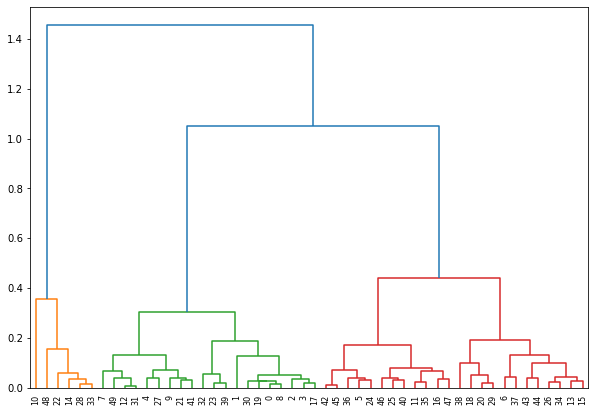

In [21]:
# Create Dendrograms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method = "ward"))

In [22]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [29]:
y_hc = hclusters.fit_predict(crime_norm)
y_hc

array([1, 1, 2, 0, 2, 0, 3, 1, 2, 0, 4, 3, 1, 3, 4, 3, 3, 1, 4, 2, 0, 1,
       4, 1, 0, 3, 3, 1, 4, 0, 2, 1, 2, 4, 3, 0, 0, 3, 0, 1, 4, 0, 0, 3,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [30]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [31]:
Clusters.value_counts()

Clusters
0           14
4           10
3           10
1           10
2            6
dtype: int64

In [32]:
crime['Clusters'] = hclusters.labels_
crime

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [34]:
crime.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,8.214286,173.285714,70.642857,22.842857
1,1,12.080000,253.400000,66.000000,27.450000
2,2,11.366667,304.500000,72.166667,29.916667
3,3,5.590000,112.400000,65.600000,17.270000
4,4,2.950000,62.700000,53.900000,11.510000


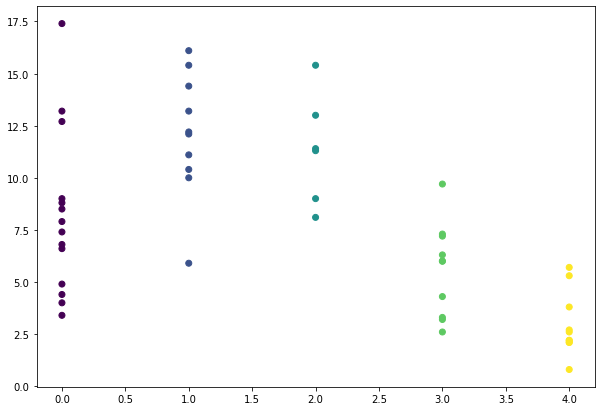

In [35]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Clusters'],crime['Murder'], c = hclusters.labels_)

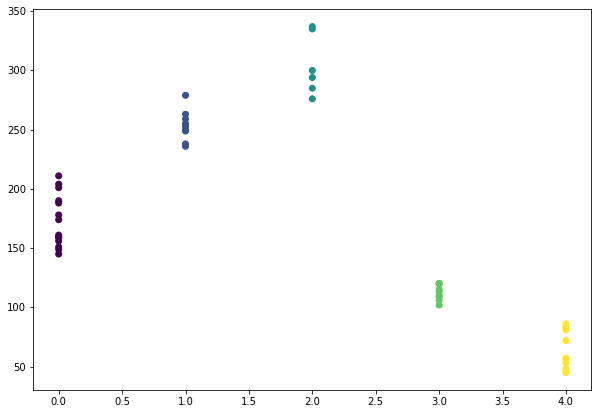

In [36]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Clusters'],crime['Assault'], c = hclusters.labels_)

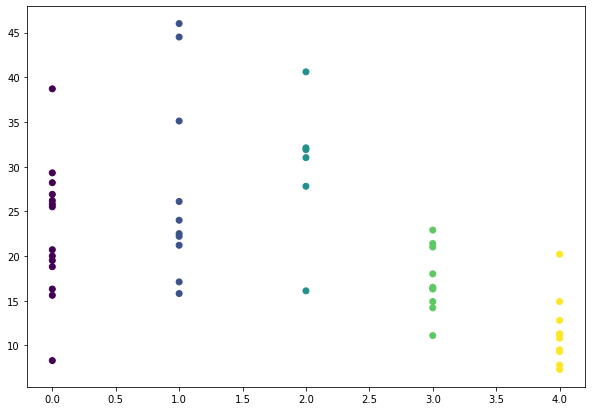

In [37]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['Clusters'],crime['Rape'], c = hclusters.labels_)